# 1. preprocessing

### 1-0) Import packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
%config InlineBackend.figure_format = 'retina'
import matplotlib.font_manager as fm
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=9)
plt.rc('font', family='NanumBarunGothic') 
mpl.font_manager._rebuild()

### 1-1) Loading Data

In [2]:
data=pd.read_csv('201901-202003.csv')
data.columns = ['연월','카드이용_시도','카드이용_시군구','업종명','고객거주_시도','고객거주_시군구','연령대','성별','가구생애주기','이용고객수','이용금액','이용건수']
data.head(2)

,연월,카드이용_시도,카드이용_시군구,업종명,고객거주_시도,고객거주_시군구,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
0,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,20s,1,1,4,311200,4
1,201901,강원,강릉시,건강보조식품 소매업,강원,강릉시,30s,1,2,7,1374500,8


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24697792 entries, 0 to 24697791
Data columns (total 12 columns):
 #   Column    Dtype 
---  ------    ----- 
 0   연월        int64 
 1   카드이용_시도   object
 2   카드이용_시군구  object
 3   업종명       object
 4   고객거주_시도   object
 5   고객거주_시군구  object
 6   연령대       object
 7   성별        int64 
 8   가구생애주기    int64 
 9   이용고객수     int64 
 10  이용금액      int64 
 11  이용건수      int64 
dtypes: int64(6), object(6)
memory usage: 2.2+ GB


### 1-2) Missing Values

In [4]:
data.isnull().sum()

연월               0
카드이용_시도          0
카드이용_시군구     87213
업종명              0
고객거주_시도          0
고객거주_시군구    147787
연령대              0
성별               0
가구생애주기           0
이용고객수            0
이용금액             0
이용건수             0
dtype: int64

카드이용_시군구 와 고객거주_시군구의 결측치가 다르다.

In [5]:
data_nullcard = data[data['카드이용_시군구'].isnull()==True]
data_nullcard['카드이용_시도'].unique()

array(['세종'], dtype=object)

카드이용_시군구의 결측치는 카드이용_시도의 '세종' 지역에만 나타나는 것을 확인

In [6]:
data_nullhom = data[data['고객거주_시군구'].isnull()==True]
data_nullhom['고객거주_시도'].unique()

array(['세종'], dtype=object)

고객거주_시군구의 결측치는 고객거주_시도의 '세종' 지역에만 나타나는 것을 확인,<br>
크게 잘라서 비교를 할거라서 카드이용_시군구, 고객거주_시군구는 데이터 프레임에서 삭제

In [7]:
del data['고객거주_시군구']
del data['카드이용_시군구']
data.head(2)

,연월,카드이용_시도,업종명,고객거주_시도,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
0,201901,강원,건강보조식품 소매업,강원,20s,1,1,4,311200,4
1,201901,강원,건강보조식품 소매업,강원,30s,1,2,7,1374500,8


### 1-3) 연령대

In [8]:
data['연령대'] = data['연령대'].str.rstrip('s').astype('int')
data.head(2)

,연월,카드이용_시도,업종명,고객거주_시도,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수
0,201901,강원,건강보조식품 소매업,강원,20,1,1,4,311200,4
1,201901,강원,건강보조식품 소매업,강원,30,1,2,7,1374500,8


In [9]:
data['연령대'].dtypes

dtype('int32')

### 1-4) Outlier

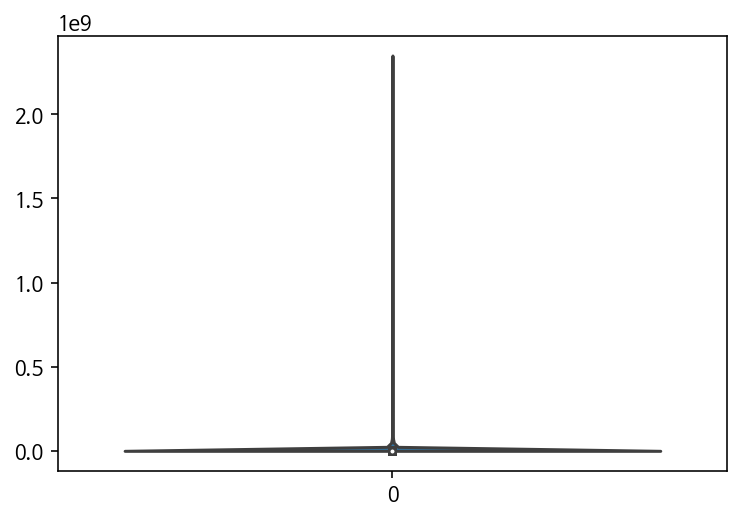

In [10]:
sns.violinplot(data=data.이용금액)
plt.show() 

C:\Users\tnqls\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tnqls\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


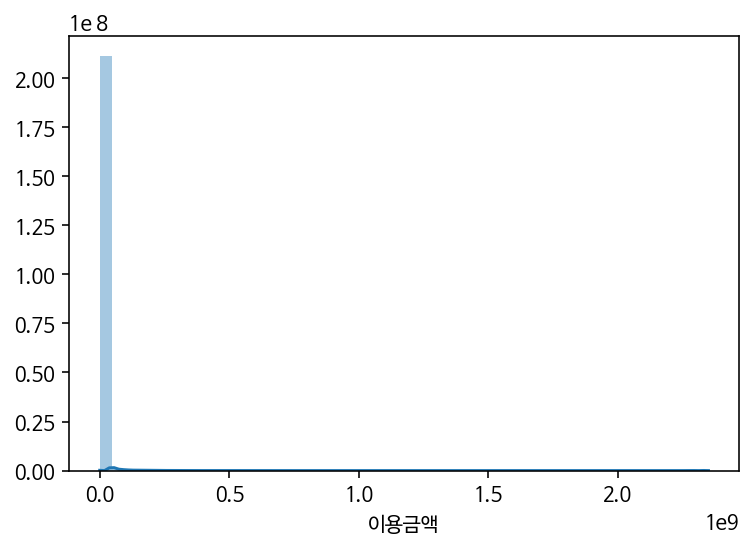

In [11]:
sns.distplot(data['이용금액'])

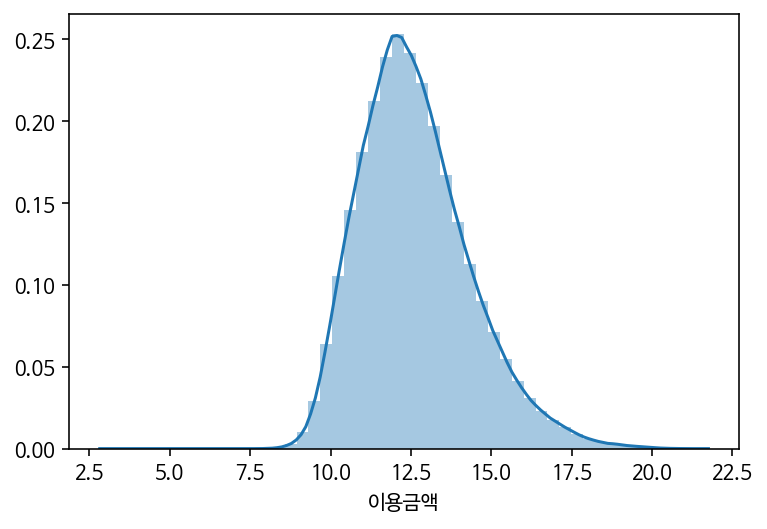

In [12]:
log_AMT = np.log(data['이용금액'])
sns.distplot(log_AMT)

# 2. Visualize columns

### 2-1) 연령대

In [13]:
print( data.연령대.unique())
df1_age = pd.DataFrame(data.연령대.value_counts().sort_index(ascending=True) )
df1_age

[20 30 40 50 60 70 10]


,연령대
10,314674
20,5091675
30,5550519
40,5802447
50,4455687
60,2606168
70,876622


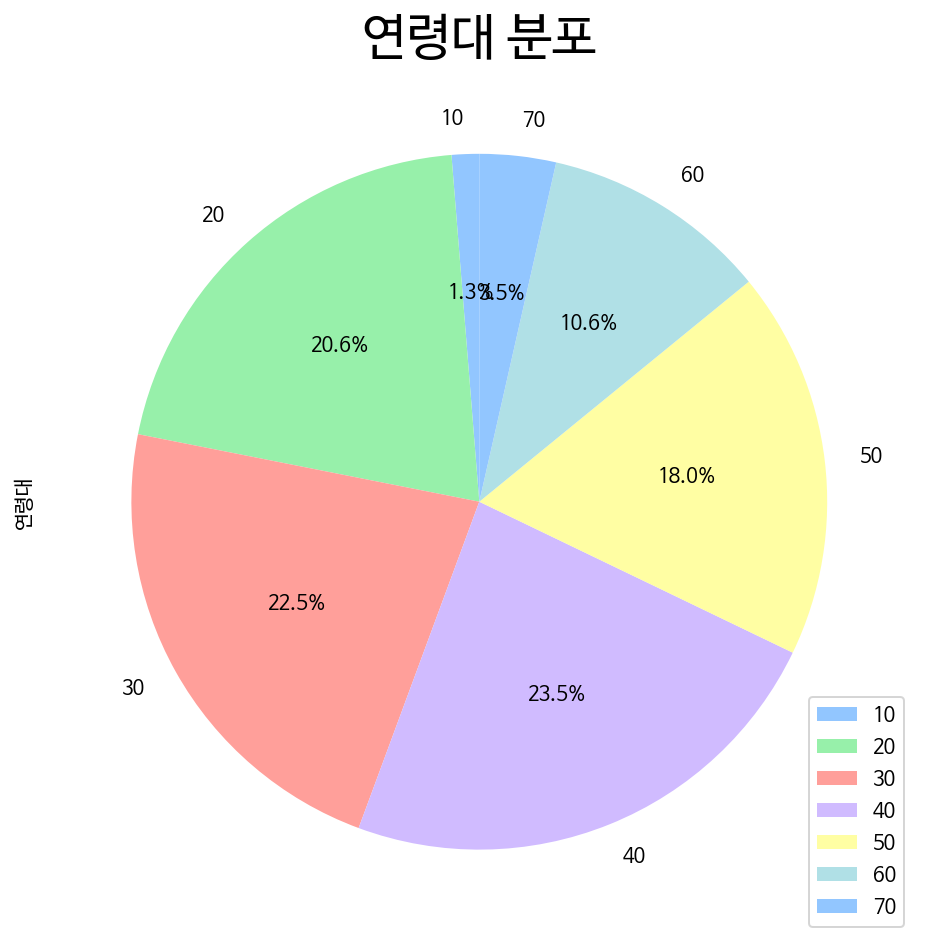

In [14]:
plt.style.use( 'seaborn-pastel')
df1_age.plot( kind = 'pie', figsize = (8,8),autopct = '%1.1f%%', startangle = 90 ,subplots=True)
plt.title( '연령대 분포', size = 25 )
plt.show()

40-30-20-50-70-10대 순으로 카드를 많이 썼다.

### 2-2) 성별

In [15]:
print( data.성별.unique())
df1_sex = data.성별.value_counts()
df1_sex = pd.DataFrame(data=df1_sex)
df1_sex 

[1 2]


,성별
1,14506378
2,10191414


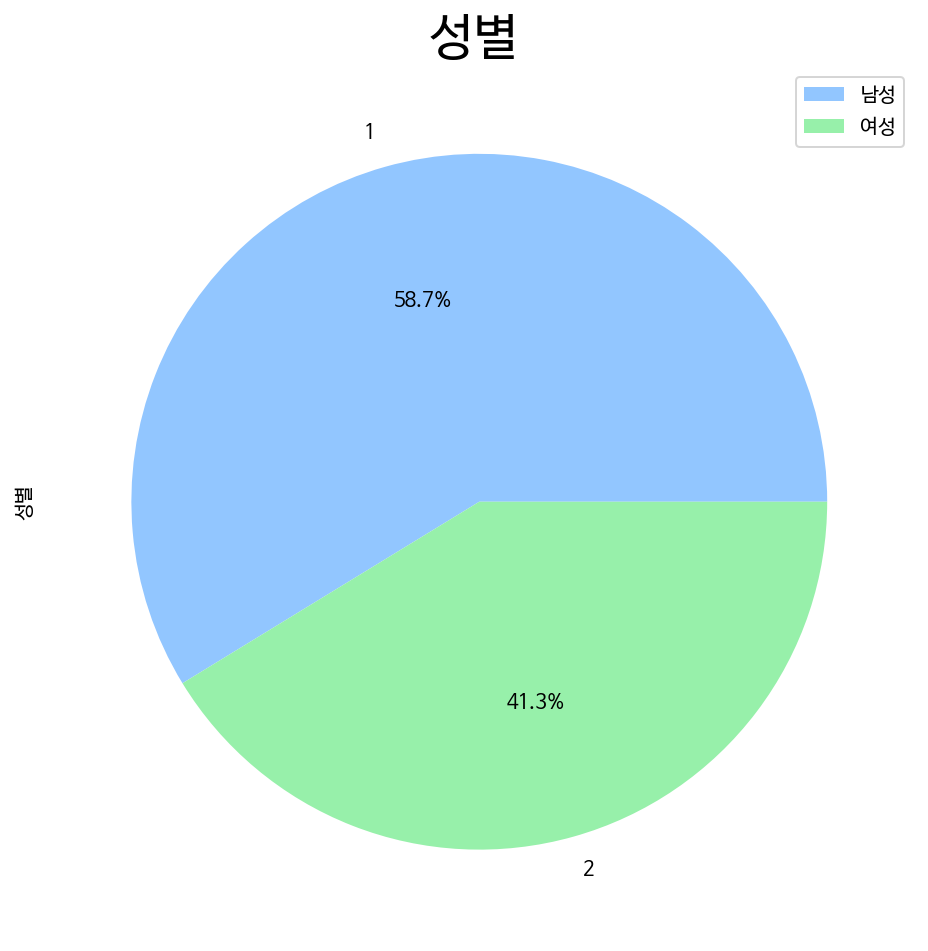

In [16]:
plt.style.use( 'seaborn-pastel')
df1_sex.plot( kind = 'pie', figsize = (8,8), autopct = '%1.1f%%' ,subplots=True   )
plt.title( '성별 ', size = 25 )
plt.legend(labels=('남성','여성'))

남성의 카드사용 횟수가 좀더 많다.

### 2-3) 가구생애주기

In [17]:
print( data.가구생애주기.unique()) 
df1_cycle = pd.DataFrame(  data.가구생애주기.value_counts().sort_index(ascending=True) )
df1_cycle

[1 2 3 4 5]


,가구생애주기
1,5526140
2,6188801
3,4054741
4,5445320
5,3482790


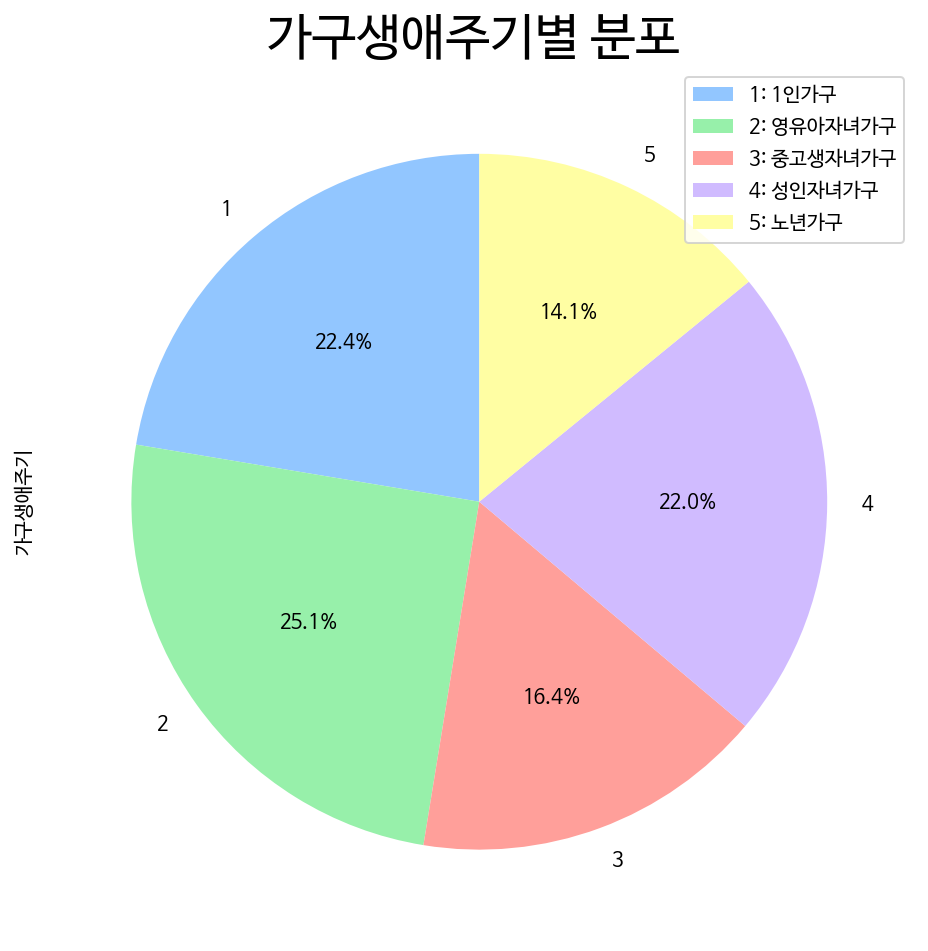

In [18]:
plt.style.use( 'seaborn-pastel')
df1_cycle.plot( kind = 'pie', figsize = (8,8), autopct = '%1.1f%%', startangle = 90, subplots=True)
plt.title( '가구생애주기별 분포 ', size = 25 )
plt.legend(labels=('1: 1인가구', '2: 영유아자녀가구', '3: 중고생자녀가구', '4: 성인자녀가구', '5: 노년가구'))
plt.show()

### 2-4) 년,월

연월데이터 '202001'형태를 년도와 월컬럼으로 나누어 준다.

In [19]:
data['년'] = data['연월'].astype(str).str[0:4]
data['월'] = data['연월'].astype(str).str[4:6]
data.head(2)
data['년'] = data['년'].astype('int')
data['월'] = data['월'].astype('int')

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24697792 entries, 0 to 24697791
Data columns (total 12 columns):
 #   Column   Dtype 
---  ------   ----- 
 0   연월       int64 
 1   카드이용_시도  object
 2   업종명      object
 3   고객거주_시도  object
 4   연령대      int32 
 5   성별       int64 
 6   가구생애주기   int64 
 7   이용고객수    int64 
 8   이용금액     int64 
 9   이용건수     int64 
 10  년        int32 
 11  월        int32 
dtypes: int32(3), int64(6), object(3)
memory usage: 1.9+ GB


### 2-5) 계절

In [21]:
data['계절'] = np.nan

data['계절'][data['월'] == 1]='겨울'
data['계절'][data['월'] == 2]='겨울'
data['계절'][data['월'] == 3]='봄'
data['계절'][data['월'] == 4]='봄'
data['계절'][data['월'] == 5]='봄'
data['계절'][data['월'] == 6]='여름'
data['계절'][data['월'] == 7]='여름'
data['계절'][data['월'] == 8]='여름'
data['계절'][data['월'] == 9]='가을'
data['계절'][data['월'] == 10]='가을'
data['계절'][data['월'] == 11]='가을'
data['계절'][data['월'] == 12]='겨울'

<ipython-input-21-d24073928dc1>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['계절'][data['월'] == 1]='겨울'


In [22]:
data_2019 = data[data['년']==2019]
data_2019.head()

,연월,카드이용_시도,업종명,고객거주_시도,연령대,성별,가구생애주기,이용고객수,이용금액,이용건수,년,월,계절
0,201901,강원,건강보조식품 소매업,강원,20,1,1,4,311200,4,2019,1,겨울
1,201901,강원,건강보조식품 소매업,강원,30,1,2,7,1374500,8,2019,1,겨울
2,201901,강원,건강보조식품 소매업,강원,30,2,2,6,818700,6,2019,1,겨울
3,201901,강원,건강보조식품 소매업,강원,40,1,3,4,1717000,5,2019,1,겨울
4,201901,강원,건강보조식품 소매업,강원,40,1,4,3,1047300,3,2019,1,겨울


In [23]:
print("2019년 합 : " + str(len(data_2019)))
print("2020년 합 : " + str(len(data)-len(data_2019)))
print("전체 데이터 합 : " + str(len(data)))

2019년 합 : 20425415
2020년 합 : 4272377
전체 데이터 합 : 24697792


In [24]:
season_1 =data_2019['계절']=='겨울'
season_2 =data_2019['계절']=='봄'
season_3 =data_2019['계절']=='여름'
season_4 =data_2019['계절']=='가을'
print('겨울 행의갯수:',np.sum(season_1)) 
print('봄 행의갯수:',np.sum(season_2)) 
print('여름 행의갯수:',np.sum(season_3))
print('가을 행의갯수:',np.sum(season_4))

겨울 행의갯수: 4875679
봄 행의갯수: 5096567
여름 행의갯수: 5314345
가을 행의갯수: 5138824


In [25]:
data_2019_vis = data_2019.groupby(['계절'])[['이용고객수','이용금액','이용건수']].mean().reset_index()

In [26]:
data_2019_vis=data_2019_vis.reindex([2,3,0,1])

겨울,봄,여름,가을의 행의개수가 다르기 때문에 sum이 아닌 mean을 이용해 group을 지어준다.

Text(0.5, 1.0, '계절별 이용고객수')

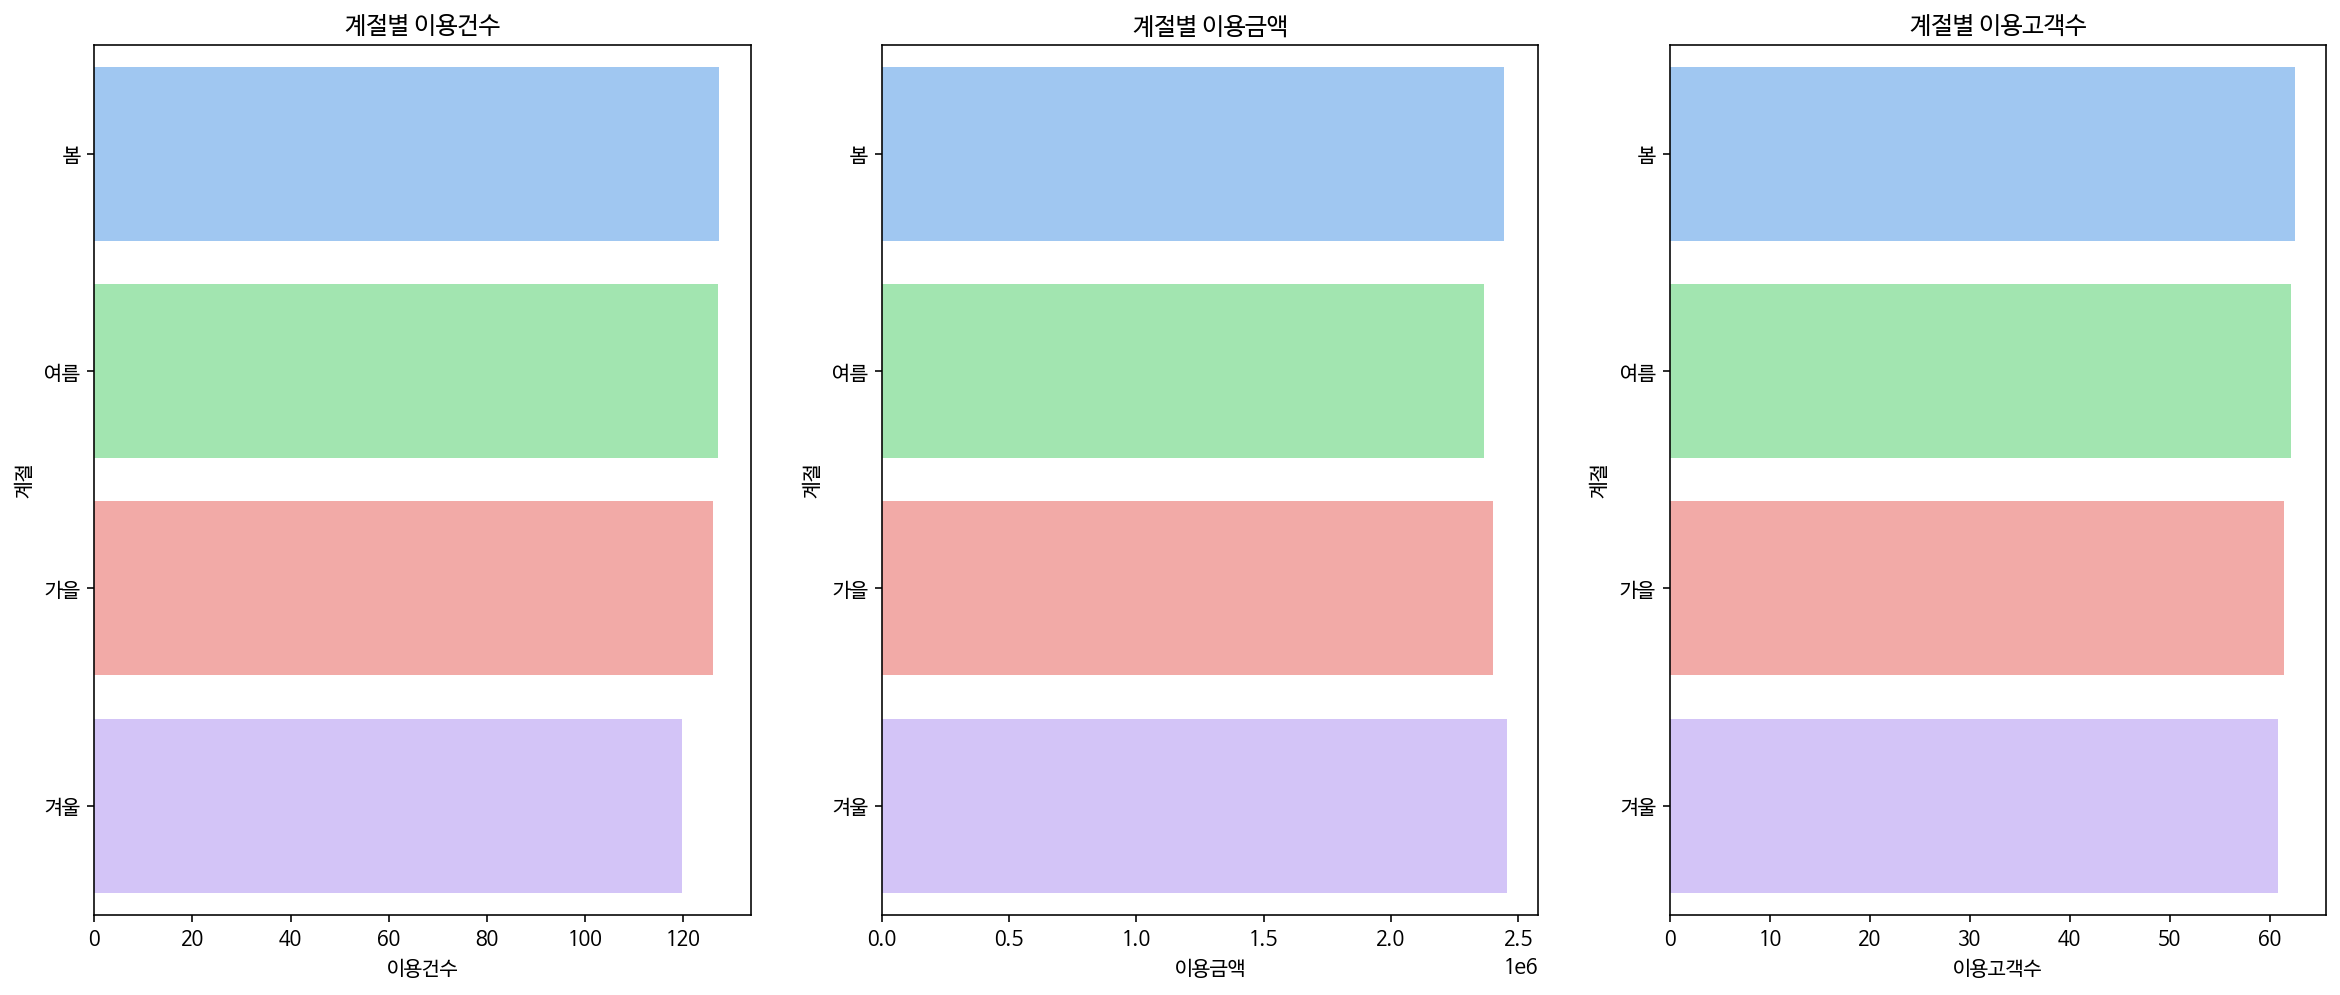

In [27]:
fig, axes = plt.subplots(figsize=(20,8),nrows=1, ncols=3,squeeze=False)
sns.barplot(x = data_2019_vis['이용건수'],y=data_2019_vis['계절'],ci=None, ax=axes[0][0]).set_title('계절별 이용건수')
sns.barplot(x = data_2019_vis['이용금액'],y=data_2019_vis['계절'],ci=None, ax=axes[0][1]).set_title('계절별 이용금액')
sns.barplot(x = data_2019_vis['이용고객수'],y=data_2019_vis['계절'],ci=None, ax=axes[0][2]).set_title('계절별 이용고객수')

#plt.savefig('correlation analysis.jpg')

계절별로 카드이용에 큰 차이는 보이지 않는다.\
계절별 업종에 차이가 있는지 확인해보자

In [28]:
data_2019_vis1 = data_2019.groupby(['계절','업종명'])[['이용고객수','이용금액','이용건수']].mean().reset_index()

Text(0.5, 1.0, '봄 상위 5개 업종')

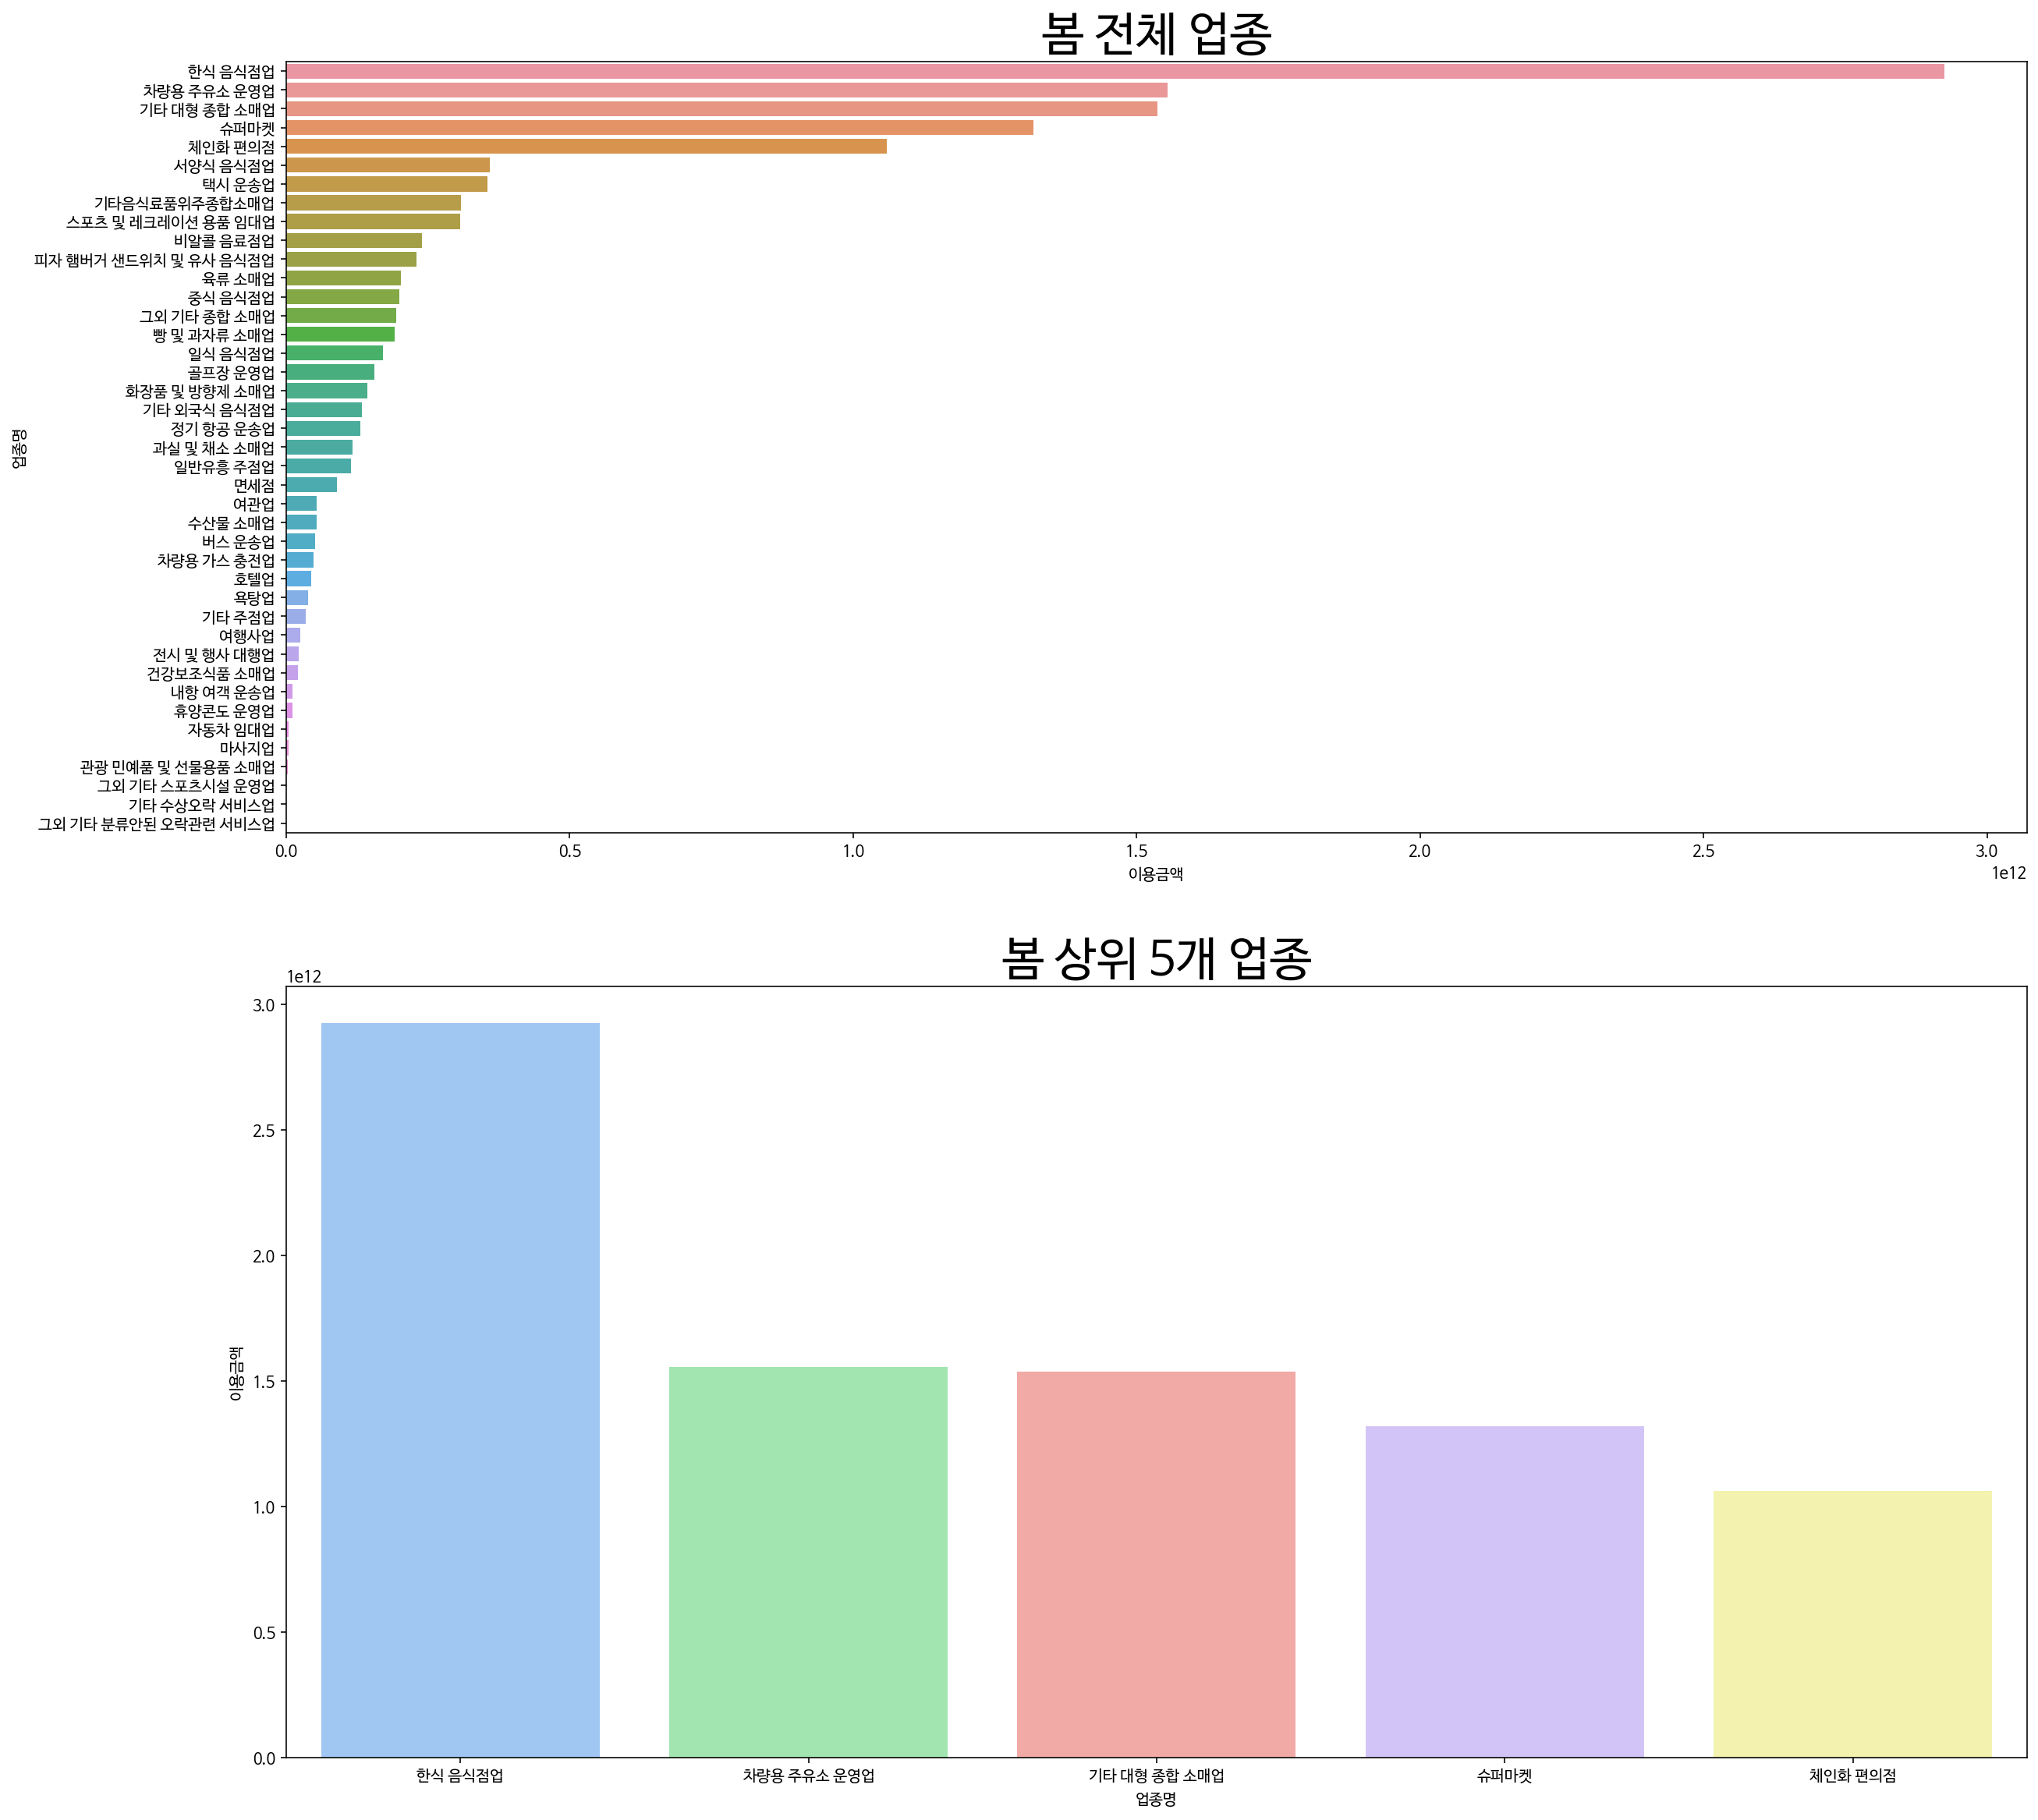

In [29]:
where=data_2019[data_2019['계절']=='봄']
where=where.groupby(['업종명'])[['이용금액']].sum().reset_index()
where=where.sort_values(by='이용금액',ascending=False)
top=where.head(5)
fig, axes = plt.subplots(figsize=(20,20),nrows=2, ncols=1,squeeze=False)
sns.barplot(x =where['이용금액'], y = where['업종명'],ci=None,ax=axes[0][0]).set_title('봄 전체 업종',size=30)
sns.barplot(y =top['이용금액'], x = top['업종명'],ci=None,ax=axes[1][0]).set_title('봄 상위 5개 업종',size=30)

한식 음식점업 - 차량용 주유소 운영업 - 기타 대형 종합 소매업 - 슈퍼마켓 -체인화 편의점 순으로 높다

Text(0.5, 1.0, '여름 상위 5개 업종')

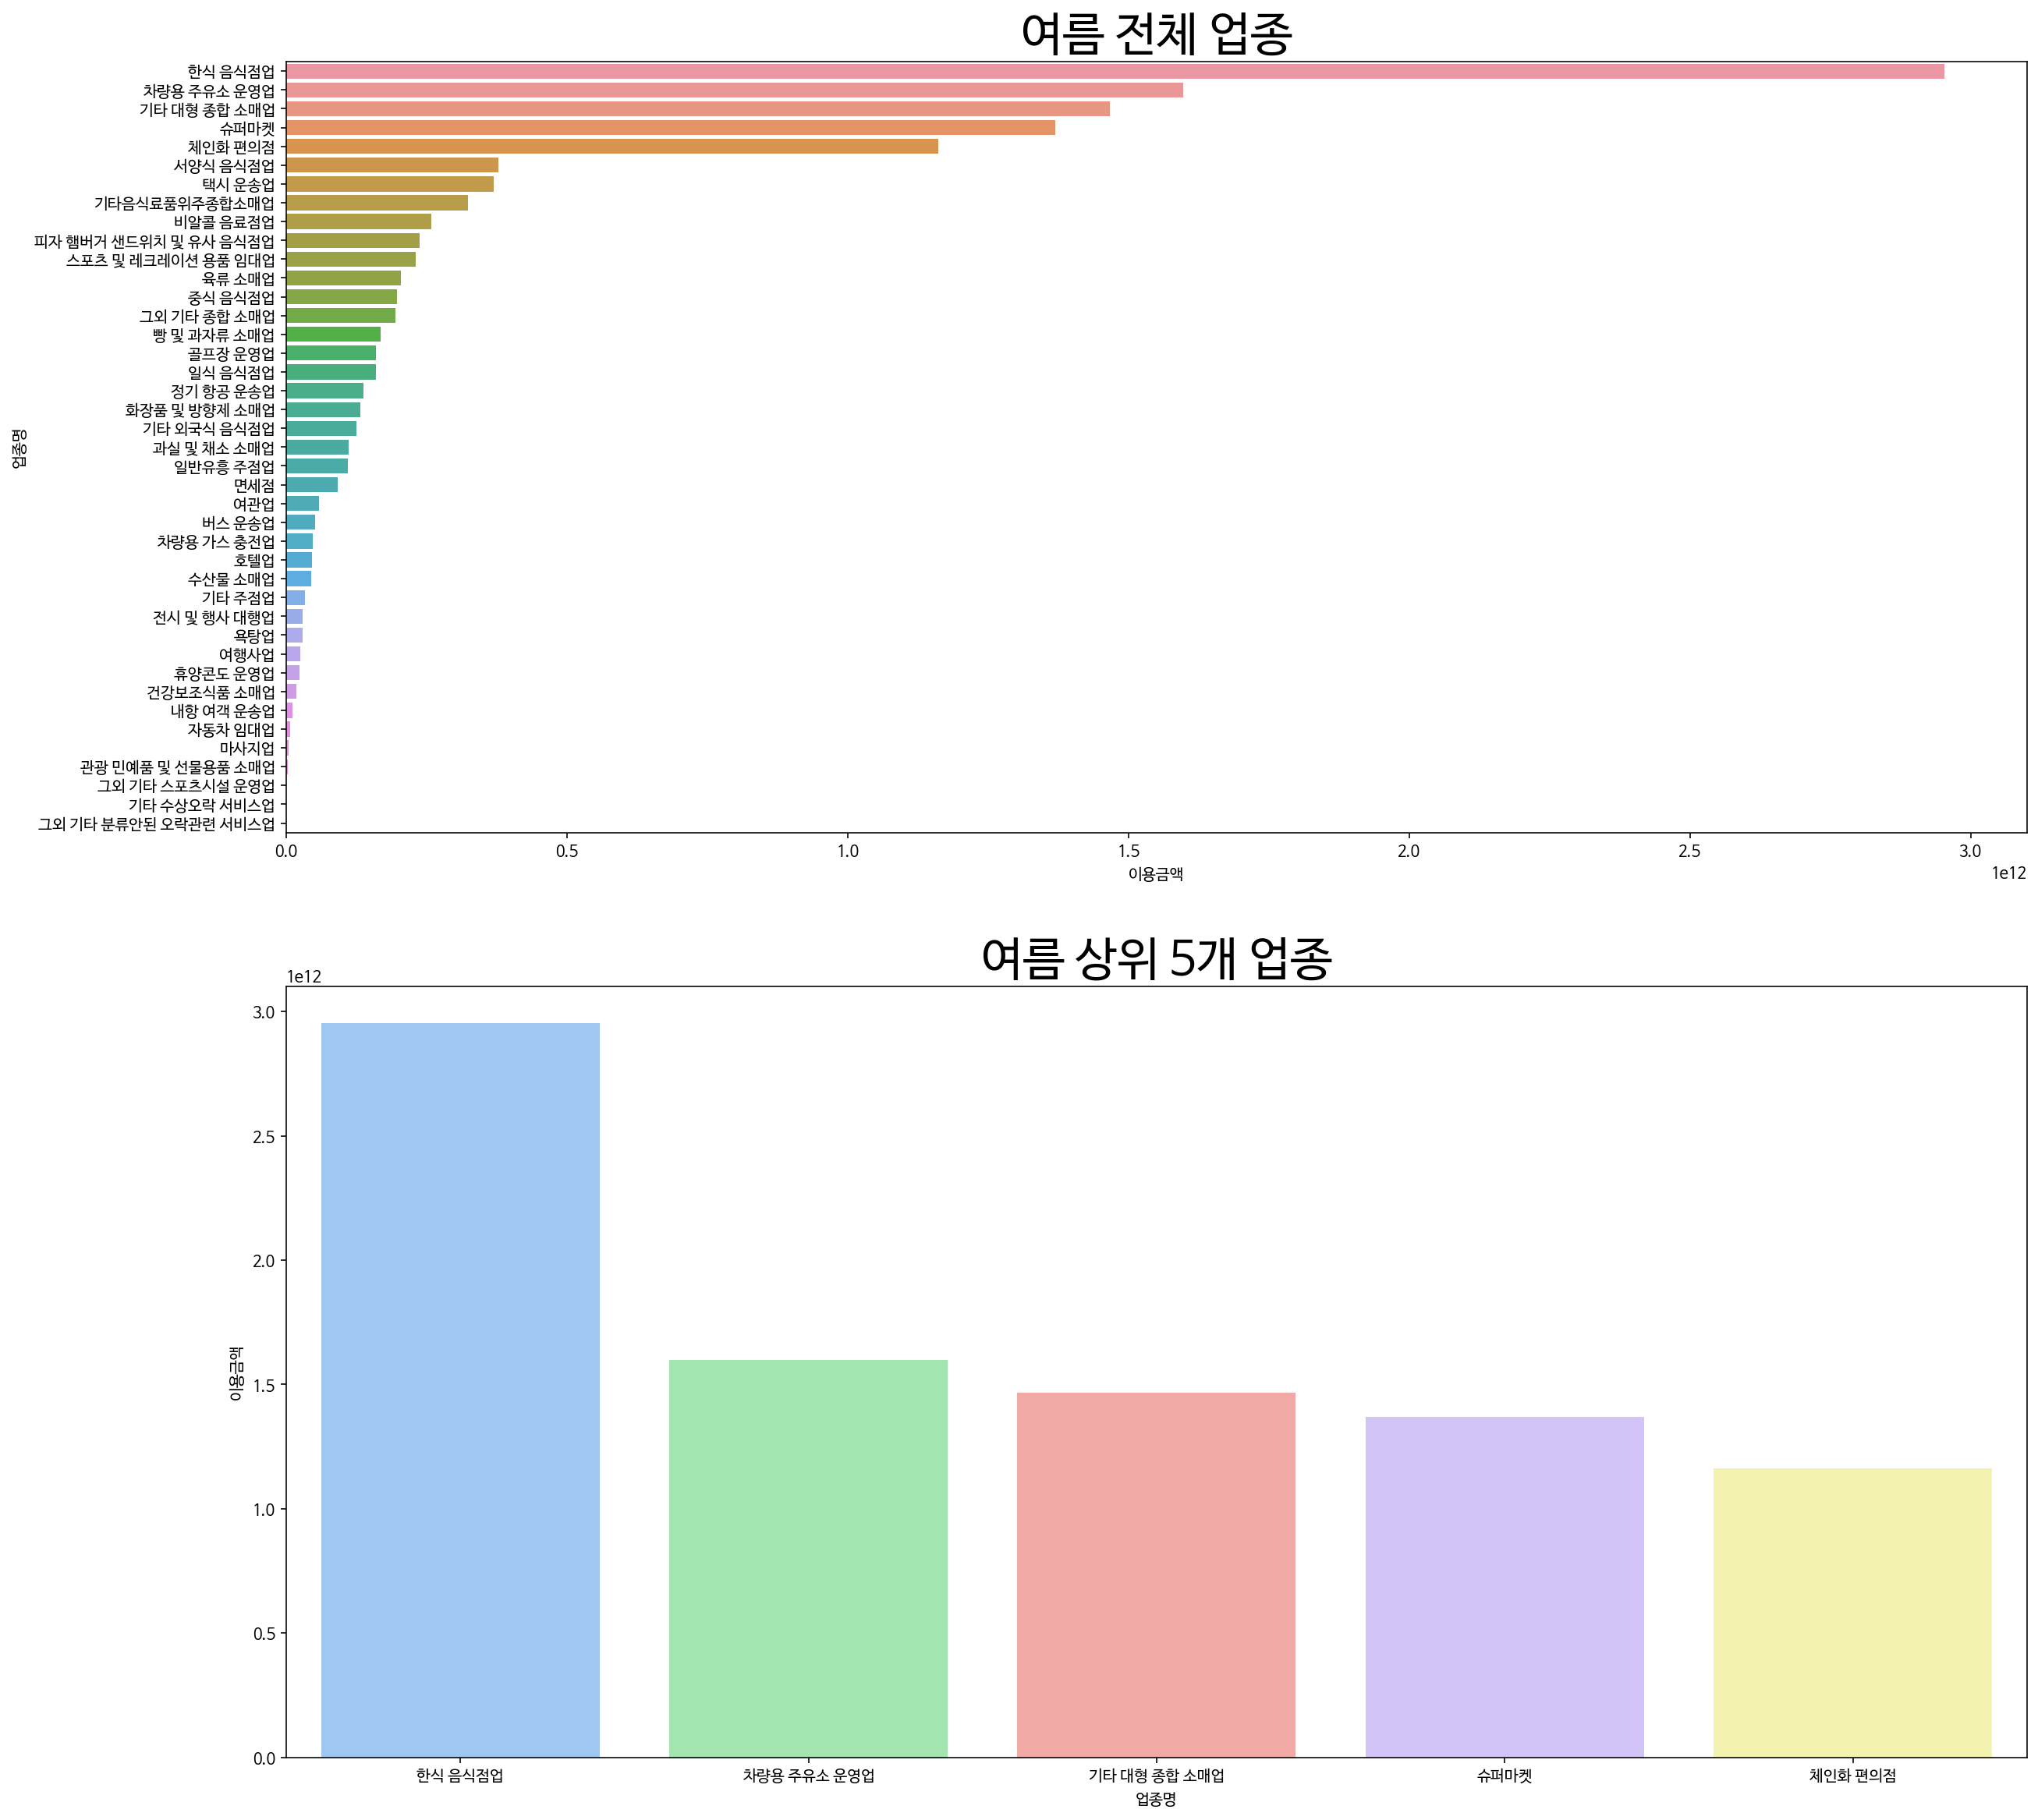

In [30]:
where=data_2019[data_2019['계절']=='여름']
where=where.groupby(['업종명'])[['이용금액']].sum().reset_index()
where=where.sort_values(by='이용금액',ascending=False)
top=where.head(5)
fig, axes = plt.subplots(figsize=(20,20),nrows=2, ncols=1,squeeze=False)
sns.barplot(x =where['이용금액'], y = where['업종명'],ci=None,ax=axes[0][0]).set_title('여름 전체 업종',size=30)
sns.barplot(y =top['이용금액'], x = top['업종명'],ci=None,ax=axes[1][0]).set_title('여름 상위 5개 업종',size=30)

한식 음식점업 - 차량용 주유소 운영업 - 기타 대형 종합 소매업 - 슈퍼마켓 -체인화 편의점 순으로 높다.

Text(0.5, 1.0, '가을 상위 5개 업종')

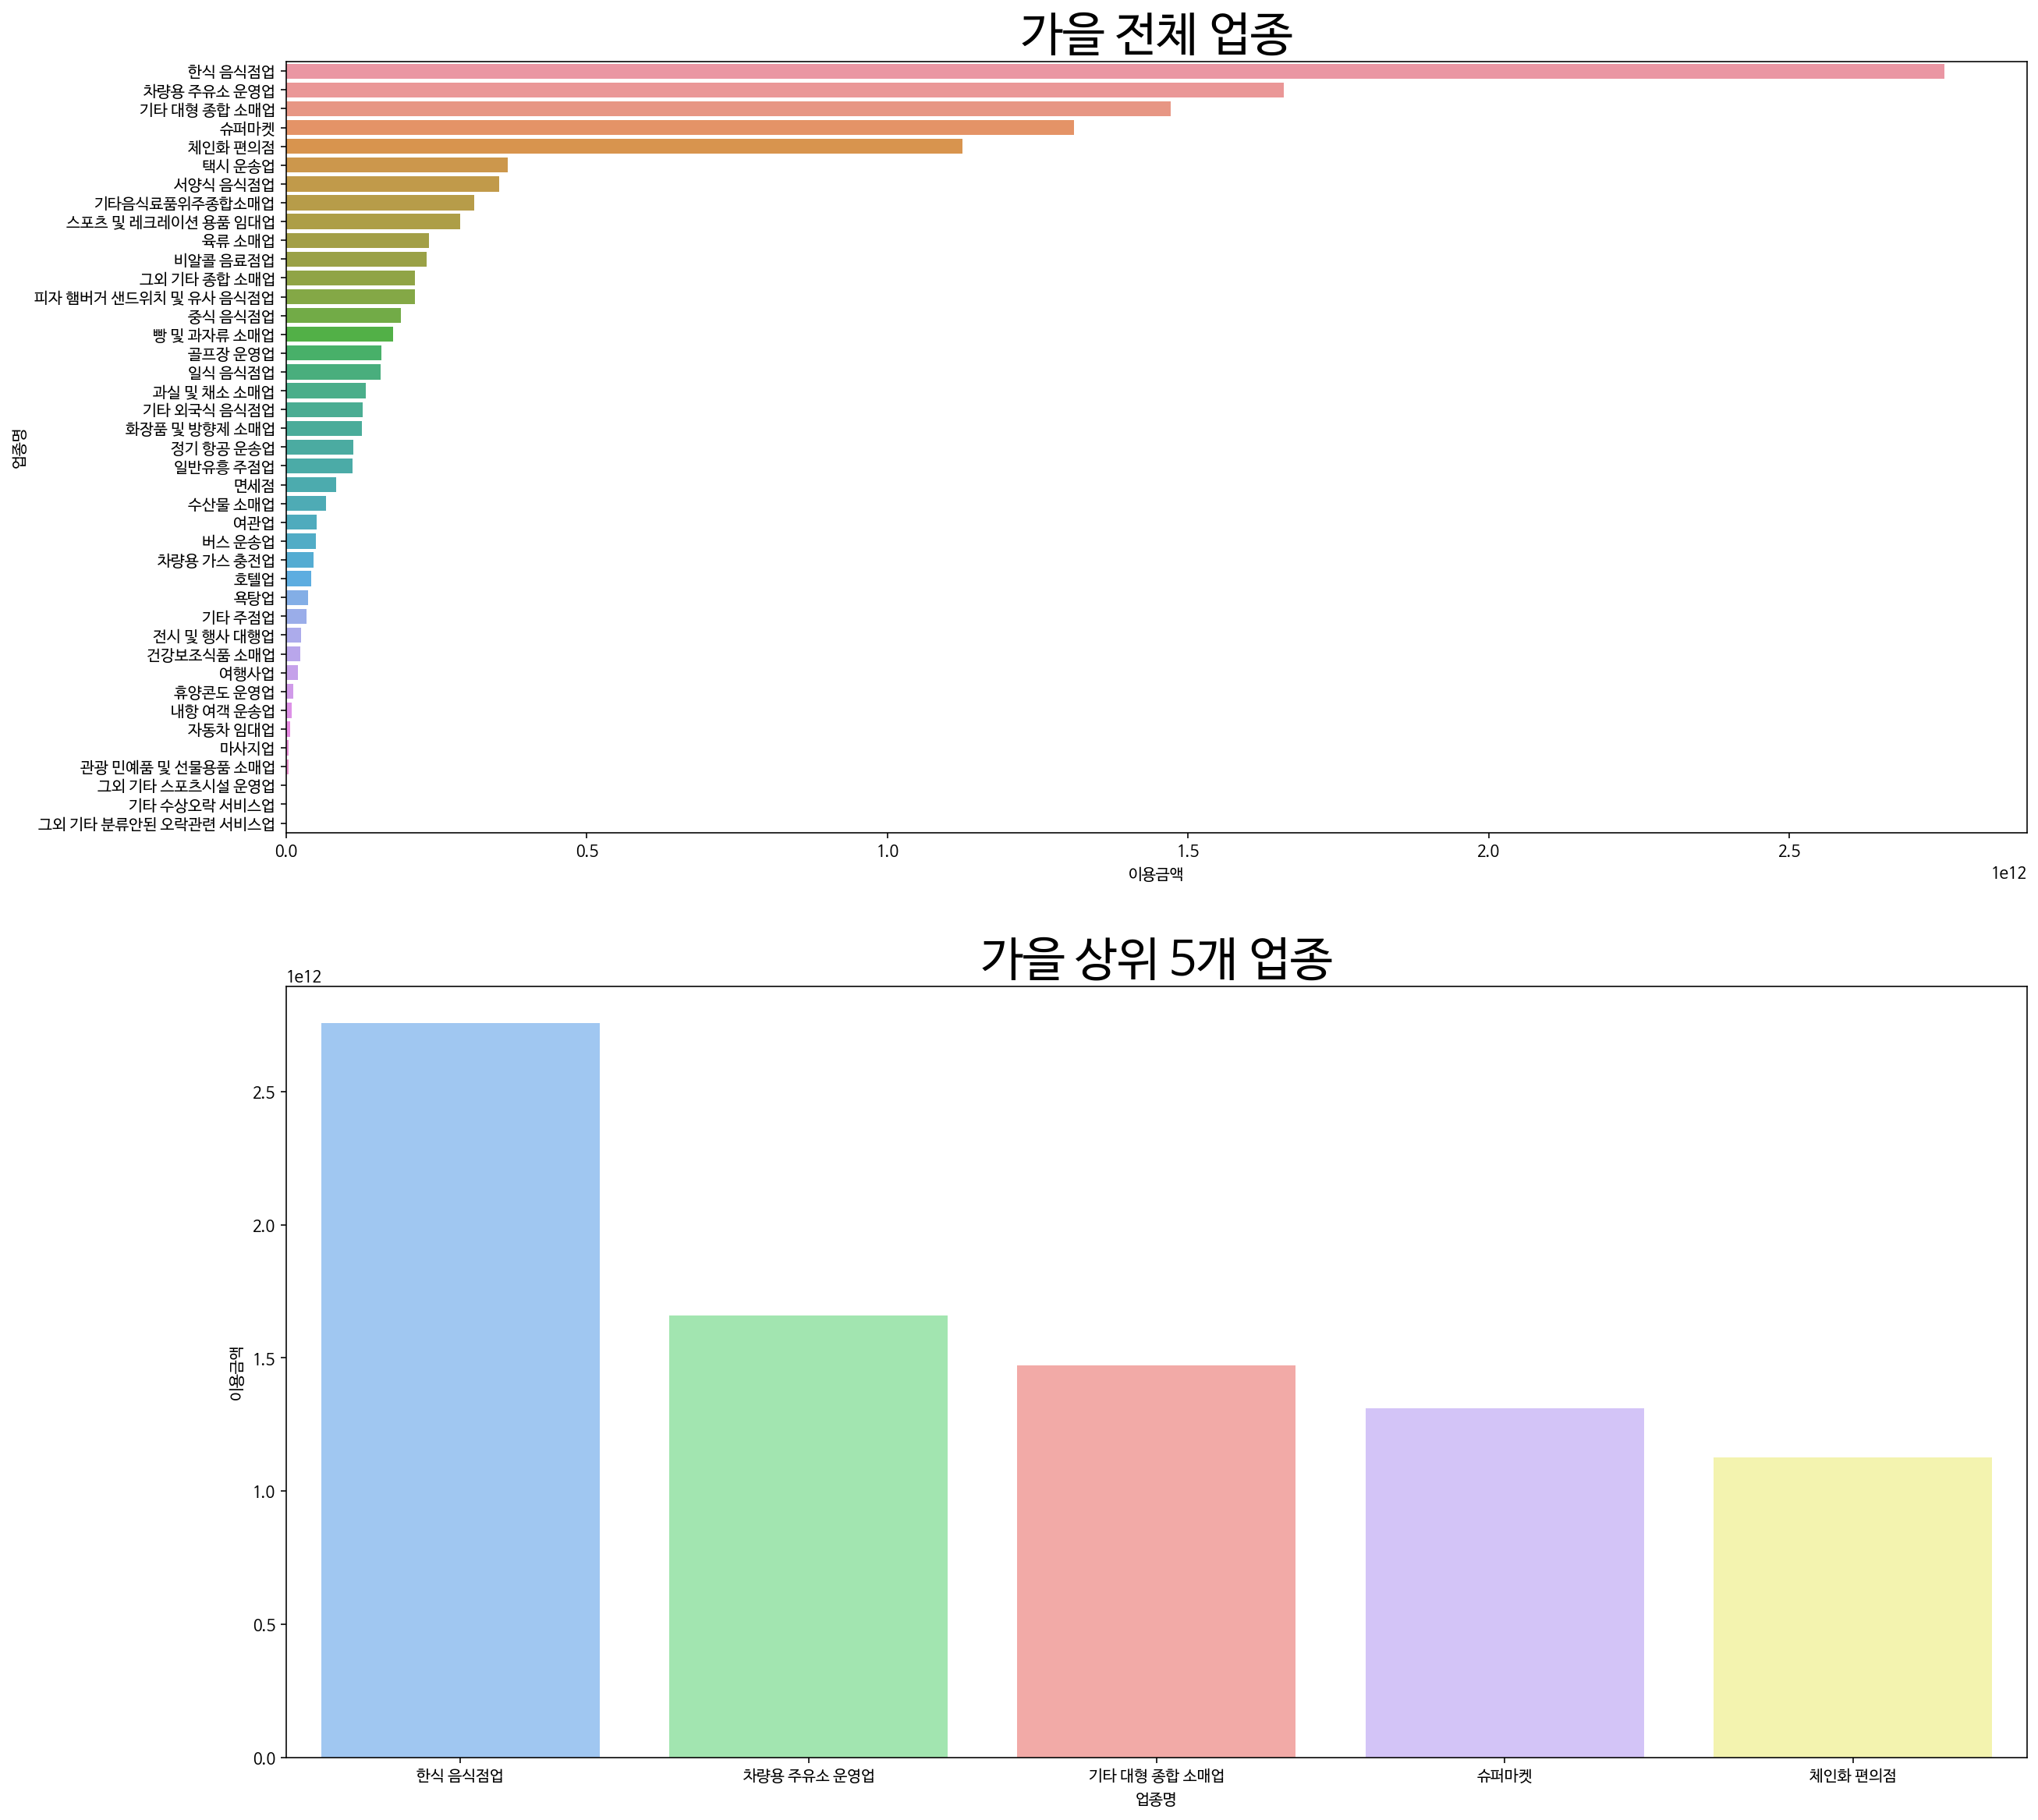

In [31]:
where=data_2019[data_2019['계절']=='가을']
where=where.groupby(['업종명'])[['이용금액']].sum().reset_index()
where=where.sort_values(by='이용금액',ascending=False)
top=where.head(5)
fig, axes = plt.subplots(figsize=(20,20),nrows=2, ncols=1,squeeze=False)
sns.barplot(x =where['이용금액'], y = where['업종명'],ci=None,ax=axes[0][0]).set_title('가을 전체 업종',size=30)
sns.barplot(y =top['이용금액'], x = top['업종명'],ci=None,ax=axes[1][0]).set_title('가을 상위 5개 업종',size=30)

한식 음식점업 - 차량용 주유소 운영업 - 기타 대형 종합 소매업 - 슈퍼마켓 -체인화 편의점 순으로 높다.

Text(0.5, 1.0, '겨울 상위 5개 업종')

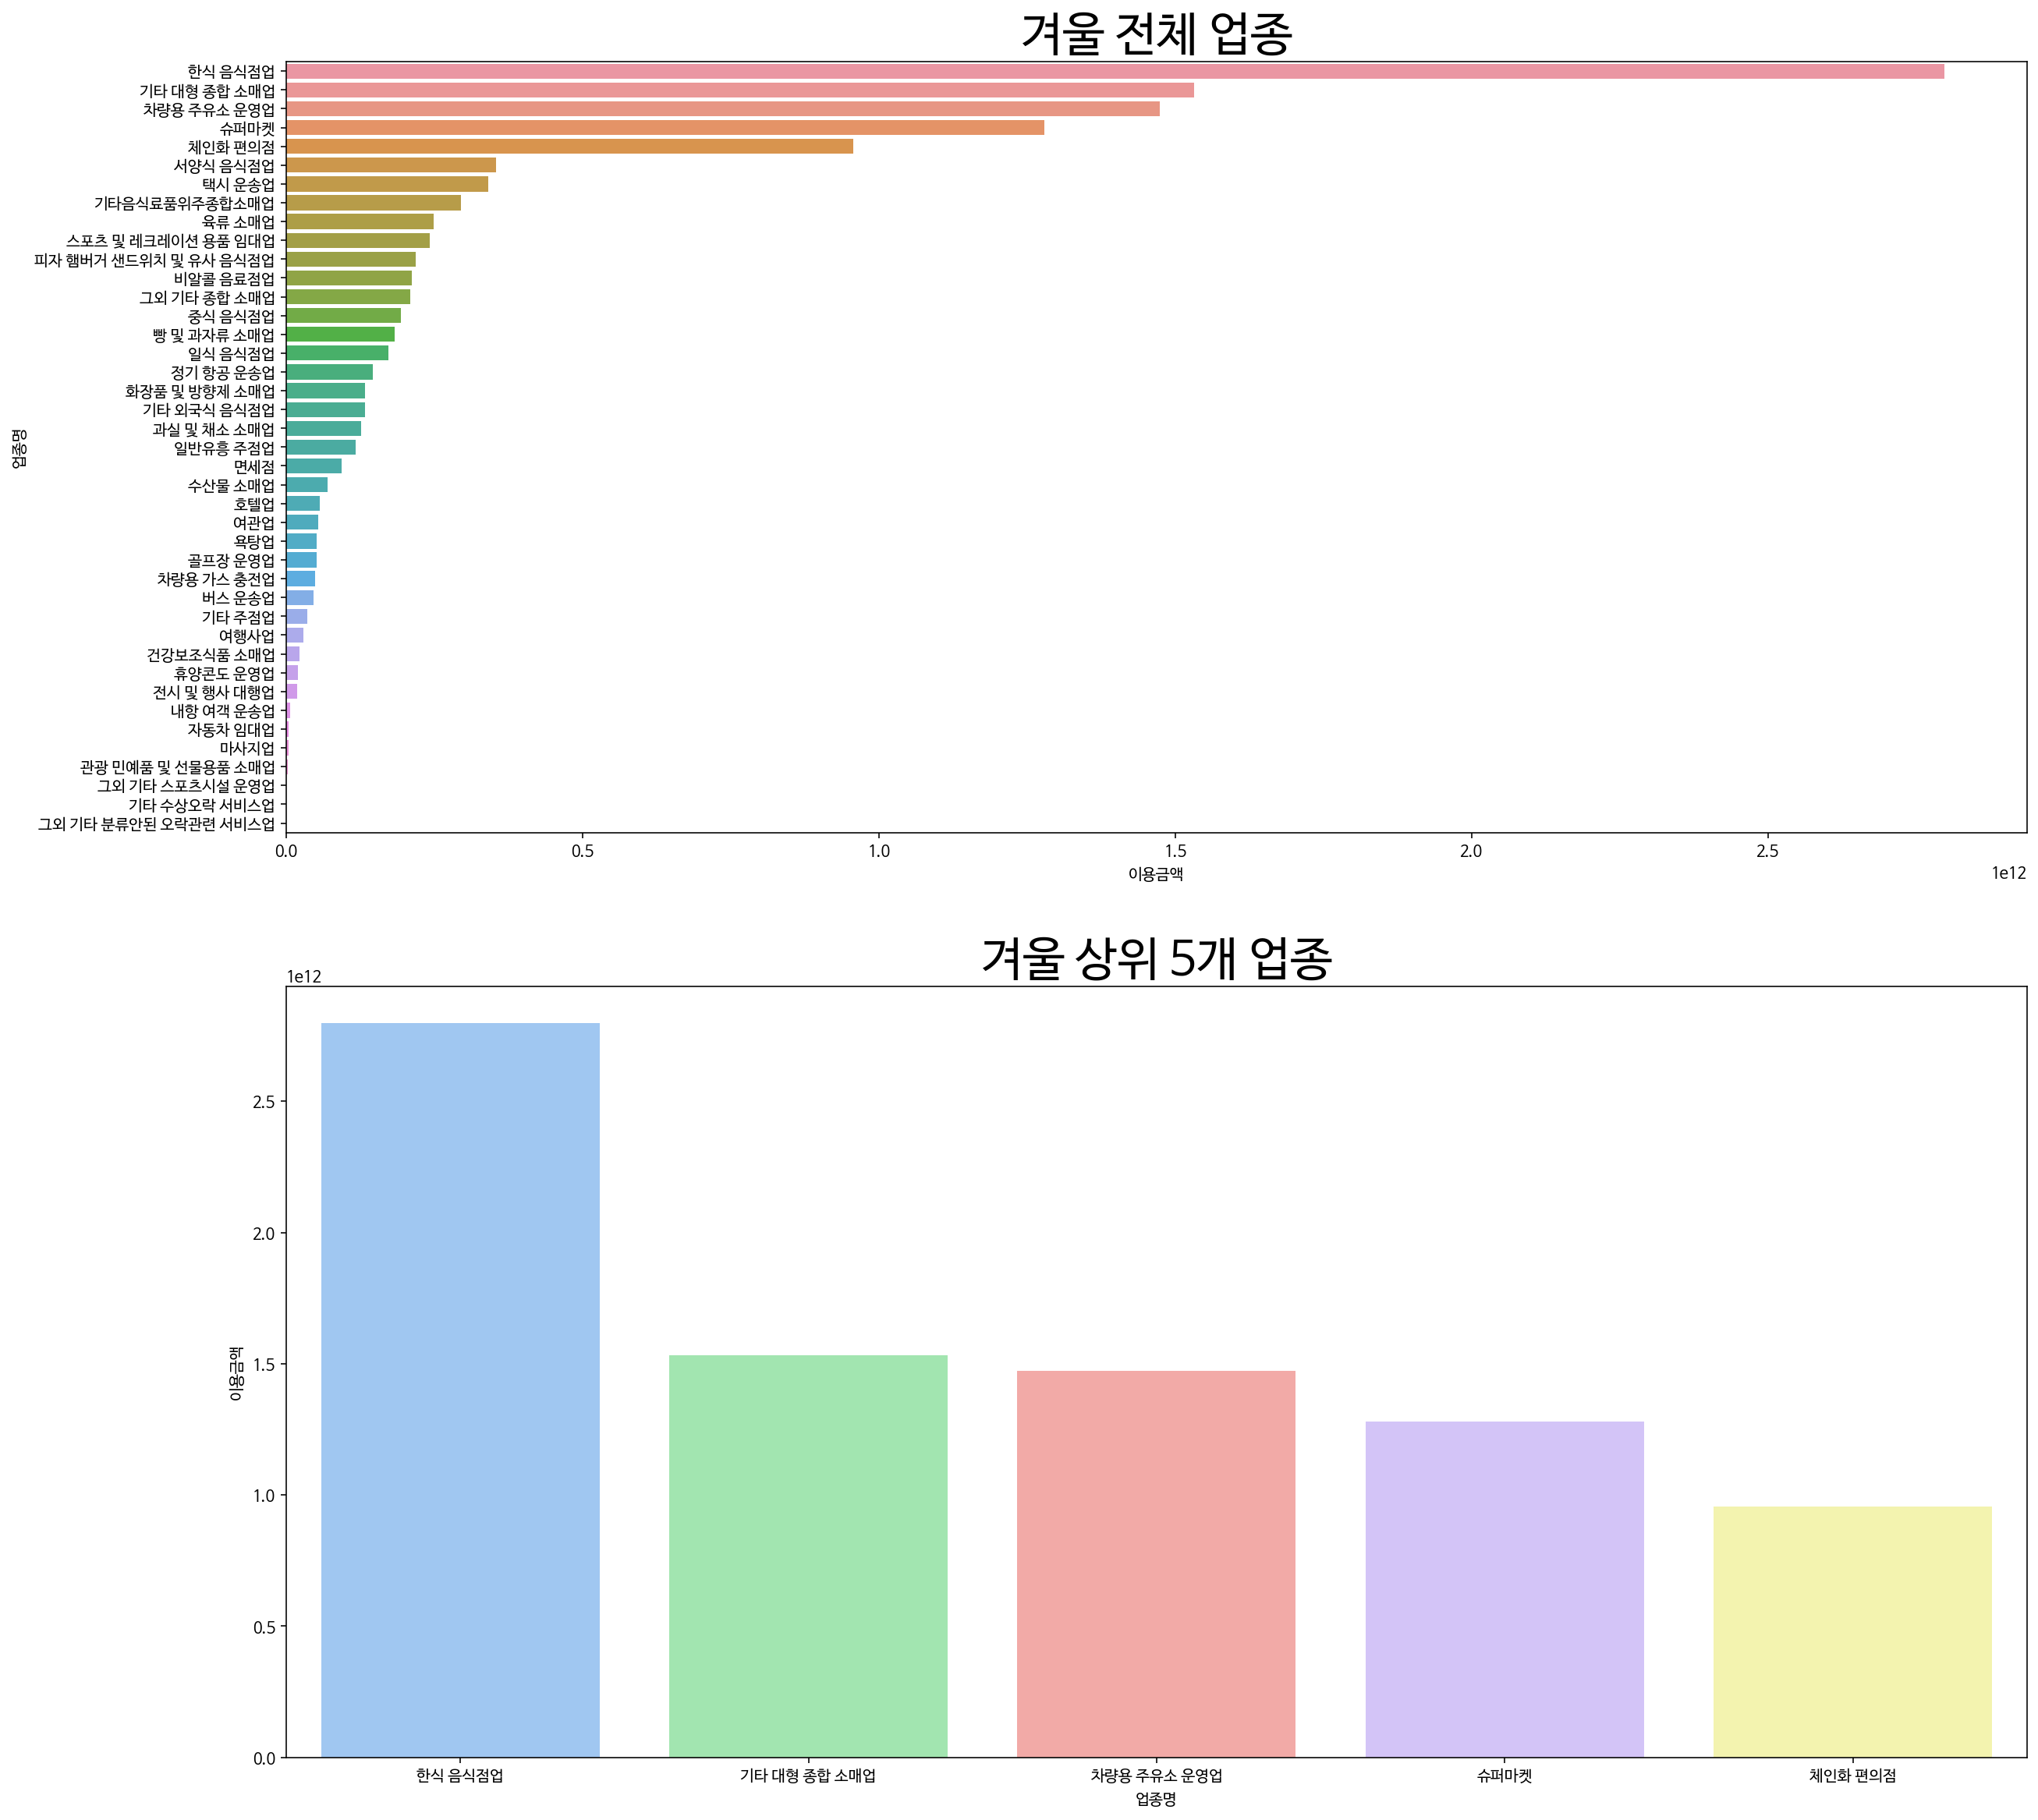

In [32]:
where=data_2019[data_2019['계절']=='겨울']
where=where.groupby(['업종명'])[['이용금액']].sum().reset_index()
where=where.sort_values(by='이용금액',ascending=False)
top=where.head(5)
fig, axes = plt.subplots(figsize=(20,20),nrows=2, ncols=1,squeeze=False)
sns.barplot(x =where['이용금액'], y = where['업종명'],ci=None,ax=axes[0][0]).set_title('겨울 전체 업종',size=30)
sns.barplot(y =top['이용금액'], x = top['업종명'],ci=None,ax=axes[1][0]).set_title('겨울 상위 5개 업종',size=30)

한식 음식점업 - 차량용 주유소 운영업 - 기타 대형 종합 소매업 - 슈퍼마켓 -체인화 편의점 순으로 높다

계절과 카드 이용은 큰 관계가 없다.

### 2-6 카드이용_시도, 고객거주_시도

In [33]:
print( data.카드이용_시도.unique() )
df1_card_sido= pd.DataFrame( data.카드이용_시도.value_counts().sort_index(ascending=True)  )

print( data.고객거주_시도.unique() )
df1_sido= pd.DataFrame( data.고객거주_시도.value_counts().sort_index(ascending=True)  )

['강원' '경기' '경남' '경북' '광주' '대구' '대전' '부산' '서울' '세종' '울산' '인천' '전남' '전북'
 '제주' '충남' '충북']
['강원' '경기' '서울' '경남' '경북' '대구' '대전' '세종' '인천' '충남' '충북' '광주' '부산' '울산'
 '전남' '전북' '제주']


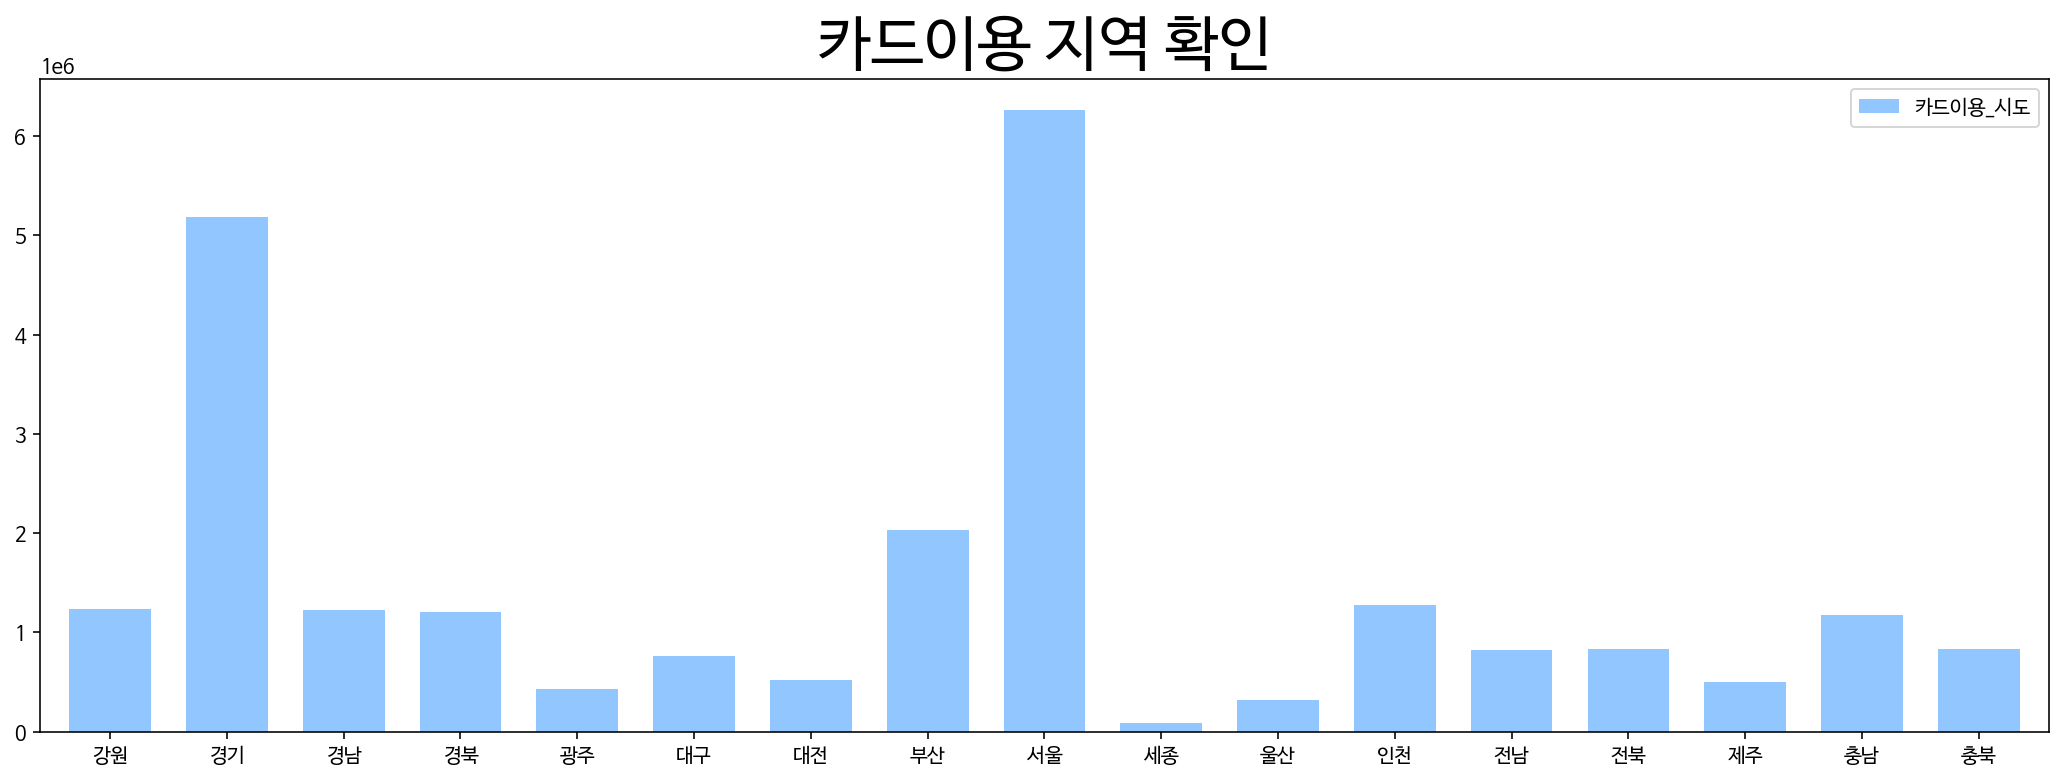

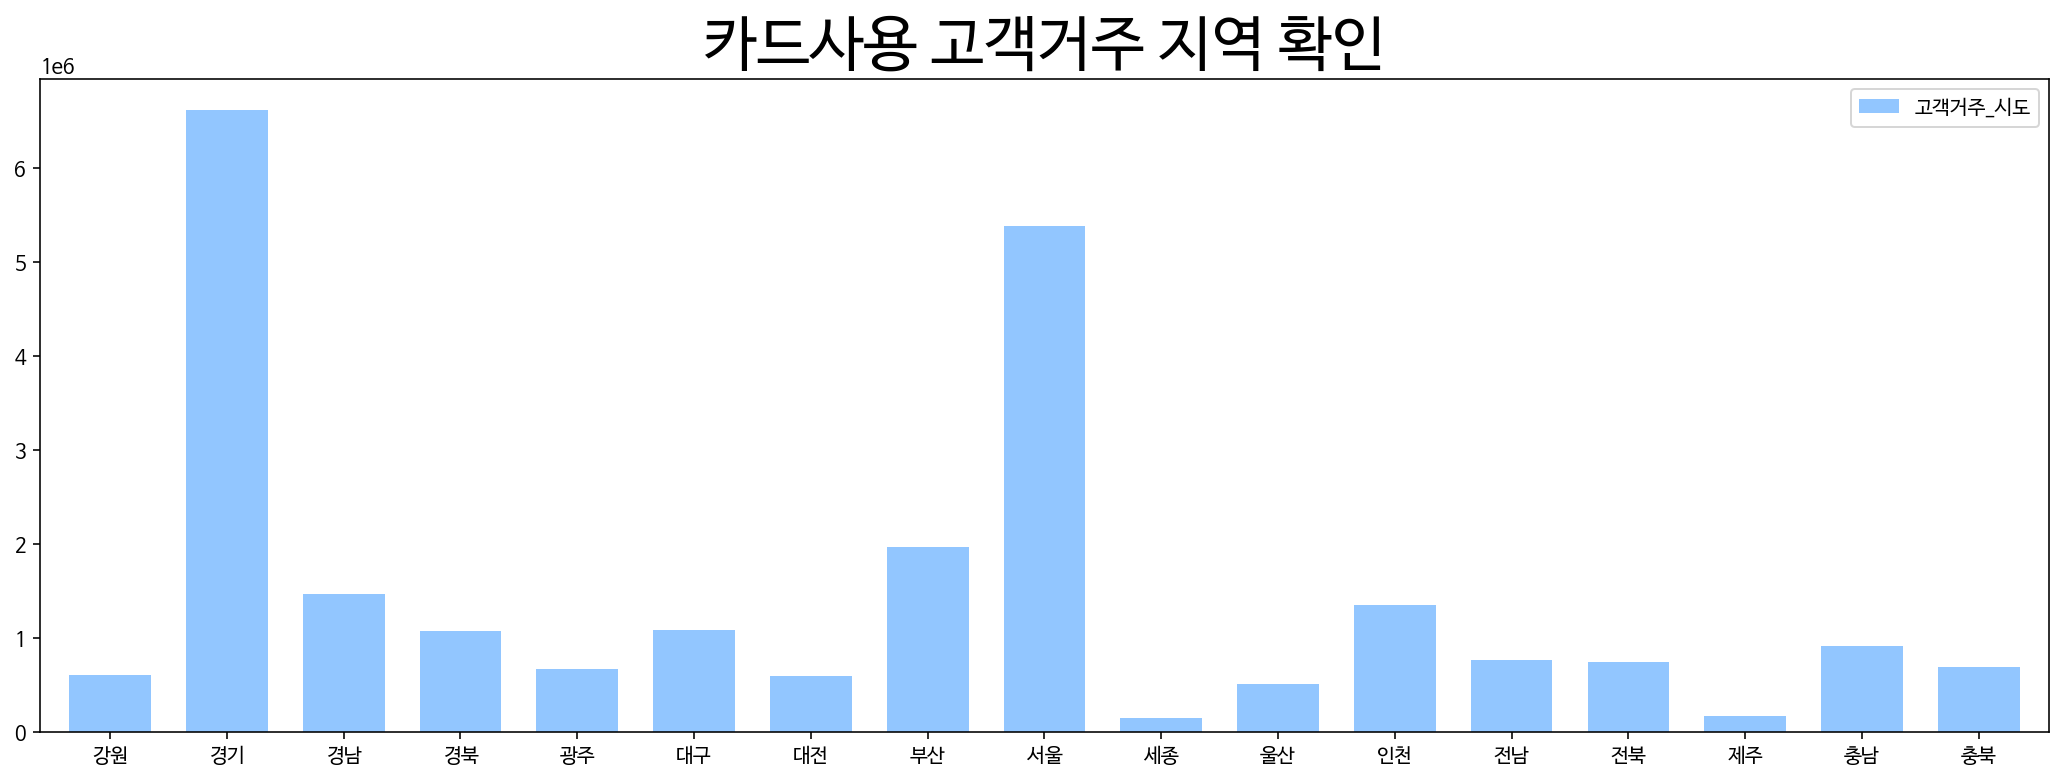

In [34]:
plt.style.use( 'seaborn-pastel' )
df1_card_sido.plot( kind = 'bar', figsize = ( 18, 6 ), width = 0.7 )
plt.xticks( rotation = 'horizontal' ) 
plt.title( '카드이용 지역 확인', size = 30 )
plt.show()

plt.style.use( 'seaborn-pastel' )
df1_sido.plot( kind = 'bar', figsize = ( 18, 6 ), width = 0.7 )
plt.xticks( rotation = 'horizontal' ) 
plt.title( '카드사용 고객거주 지역 확인', size = 30 )
plt.show()

서울 지역이 카드 사용량이 가장 많다. 하지만 사용자의 거주지중 가장 많은 지역은 경기이다.\
제주지역은 여행객이 많을 것으로 보인다. 그래서 거주지역과 카드사용지역이 다른 행을 뽑아봤따

In [35]:
ano=data[data['고객거주_시도']!=data['카드이용_시도']]
ano_1= ano.groupby(['카드이용_시도','고객거주_시도'])[['이용금액']].sum().reset_index()

In [36]:
ano_2= ano_1.groupby(['카드이용_시도'])[['이용금액']].sum().reset_index()
ano_3= ano_1.groupby(['고객거주_시도'])[['이용금액']].sum().reset_index()

Text(0.5, 1.0, '고객거주_시도')

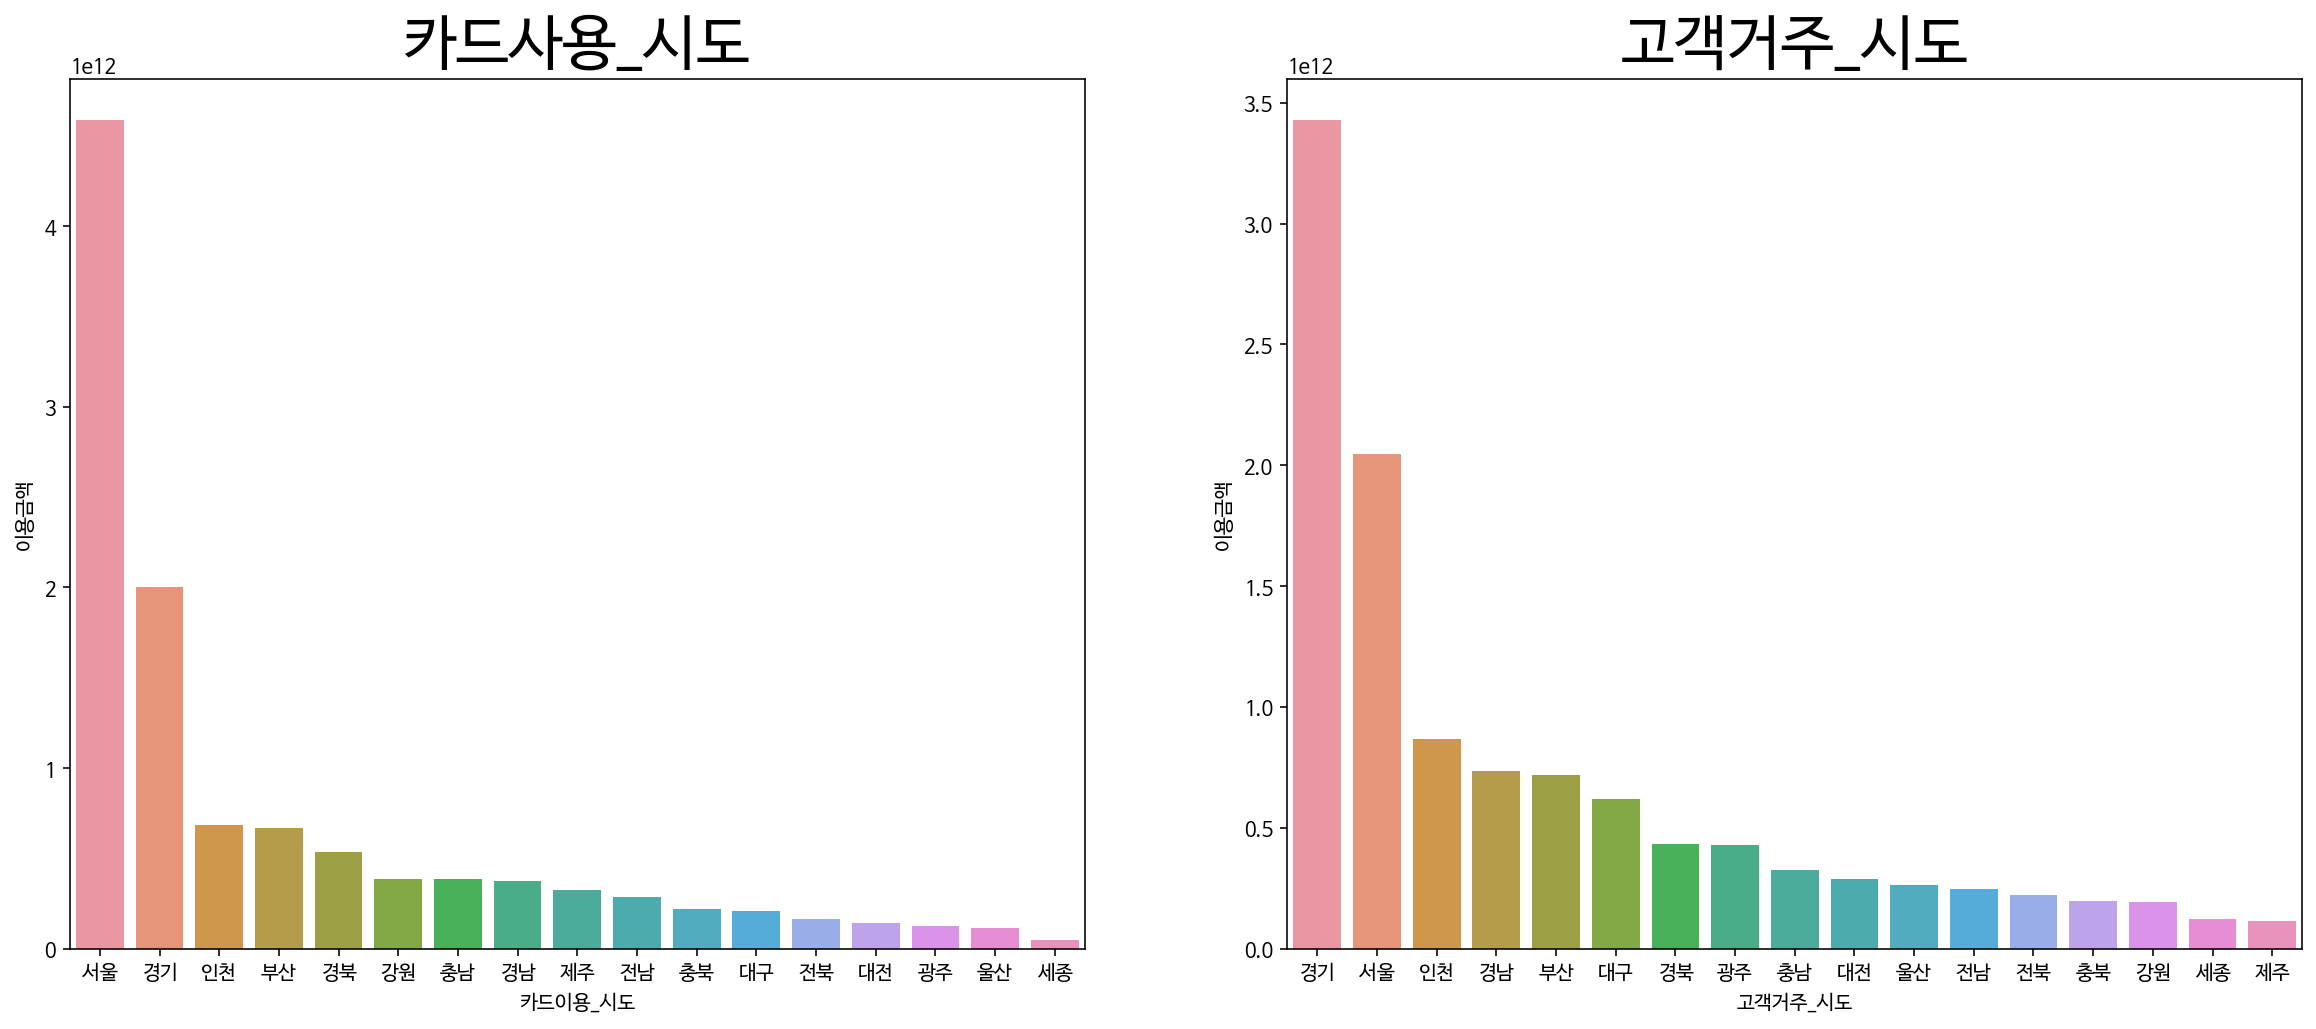

In [37]:
ano_2=ano_2.sort_values(by='이용금액',ascending=False)
ano_3=ano_3.sort_values(by='이용금액',ascending=False)
fig, axes = plt.subplots(figsize=(20,8),nrows=1, ncols=2,squeeze=False)
sns.barplot(x=ano_2['카드이용_시도'],y=ano_2['이용금액'], ci=None, ax=axes[0][0]).set_title('카드사용_시도',size=30)
sns.barplot(x=ano_3['고객거주_시도'],y =ano_3['이용금액'], ci=None,ax=axes[0][1]).set_title('고객거주_시도',size=30)

이렇게 이용금액이나 이용건수를 기준으로 나눴을 때 다른 지역에 가장 돈을 많이 쓰는  지역은 경기임을 알수 있다.\
그래서 경기도 사람들은 어느지역에 돈을 많이 쓰는지 확인해볼 것이다.

In [38]:
ano_4=ano[ano['고객거주_시도']=='경기']
ano_4= ano_4.groupby(['카드이용_시도'])[['이용금액']].sum().reset_index()
ano_4=ano_4.sort_values(by='이용금액',ascending=False)

Text(0.5, 1.0, '경기지역사람들의 소비지역')

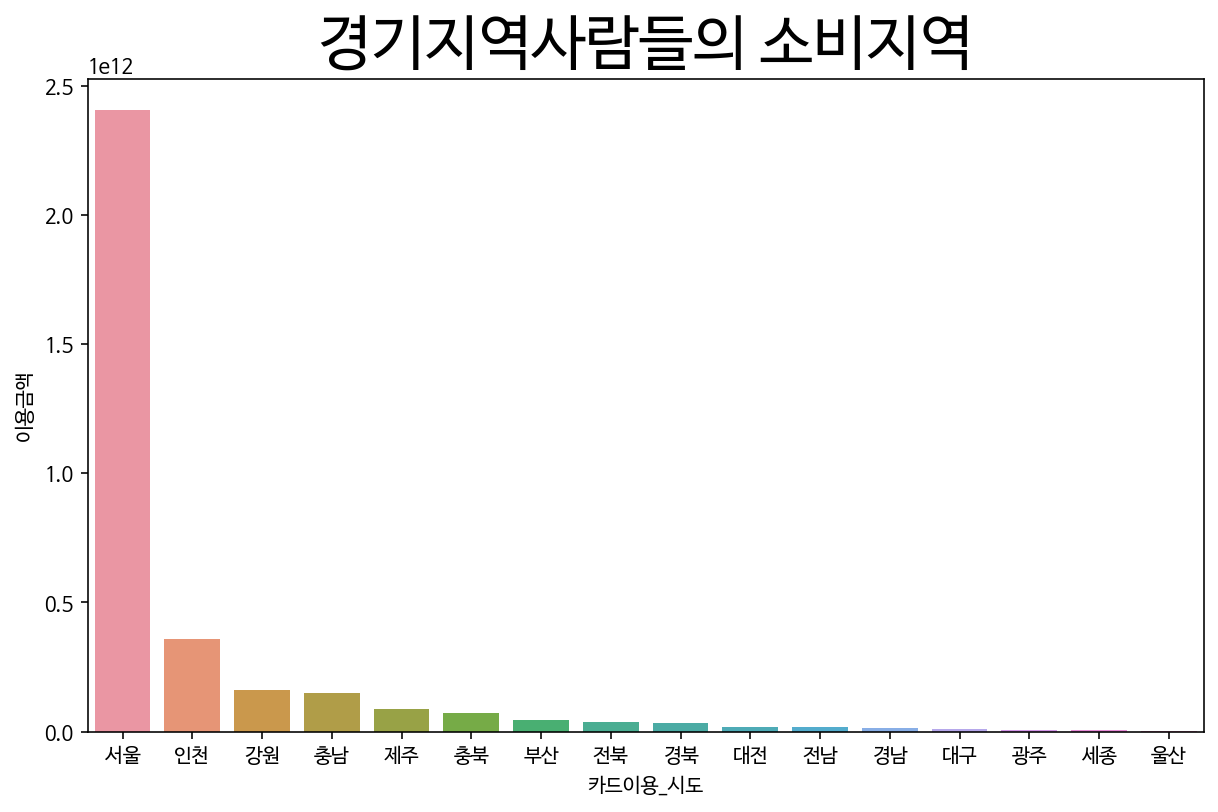

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(y =ano_4['이용금액'], x = ano_4['카드이용_시도'],ci=None).set_title('경기지역사람들의 소비지역',size=30)

경기지역의 사람들은 서울에서 사용한 금액이 가장 많은것을 볼 수 있다. 

# 3. Making Dataset for Model

C:\Users\tnqls\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\tnqls\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


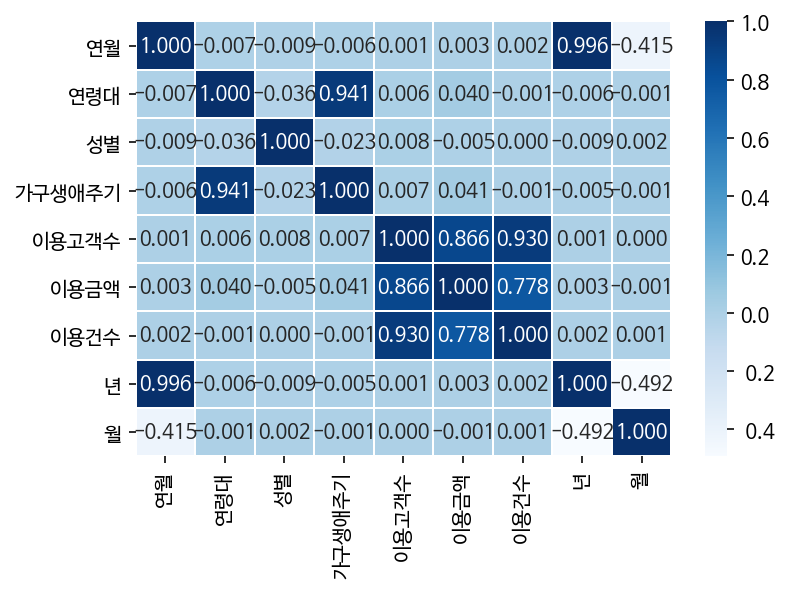

In [40]:
sns.heatmap(data = data.corr(), annot=True, 
fmt = '.3f', linewidths=.5, cmap='Blues')

이렇게 보면 불편하다고 교수님이 피드백을 주셨음. 하상각행렬로 나타내보기

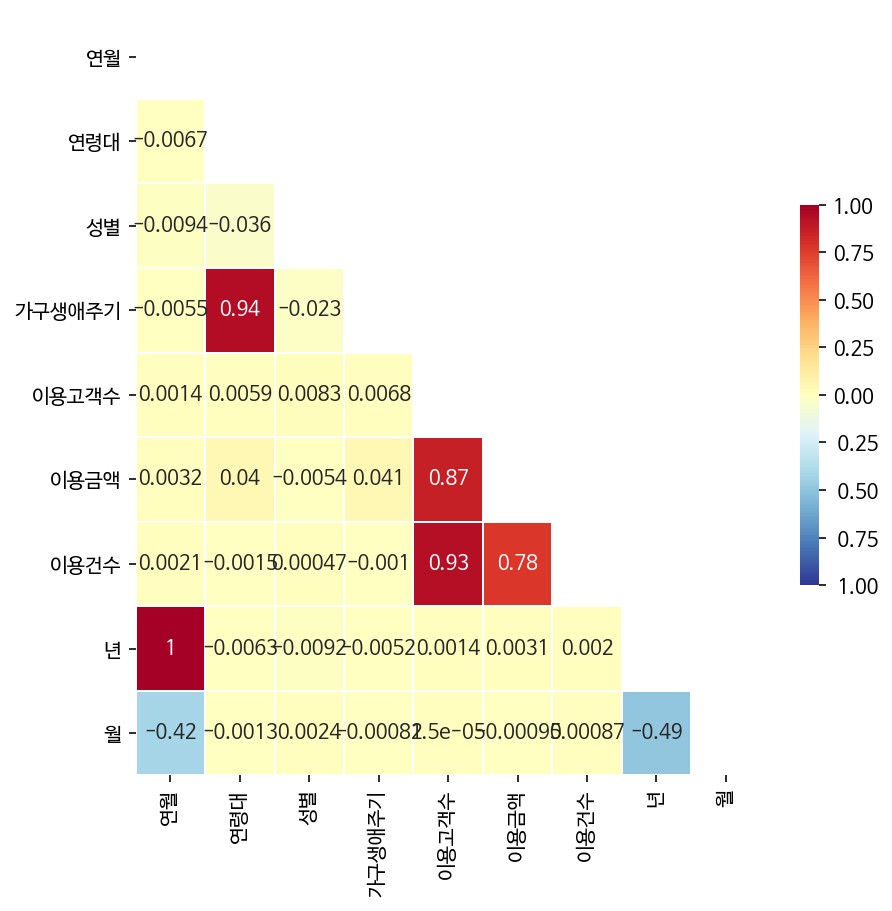

In [42]:
df = data.corr()
# 그림 사이즈 지정
fig, ax = plt.subplots( figsize=(7,7) )

# 위 쪽 삼각형에 True, 아래 삼각형에 False
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# 히트맵을 그린다
sns.heatmap(df,cmap = 'RdYlBu_r', 
            annot = True,   
            mask=mask,      # 표시하지 않을 마스크 부분 지정
            linewidths=.5,  # 경계면 실선으로 구분
            cbar_kws={"shrink": .5},# 컬러바 크기 절반으로 줄이기
            vmin = -1,vmax = 1   # 컬러바 범위 -1 ~ 1
           )  
plt.show()

상관계수가 0.4이상인 특성에 대해서만 분석에 이용할 수 있다.\
우리가 예측할 열은 이용금액 이므로 이용금액과 상관계수가 0.4이상인 특성은 이용고객수와 이용건수이다.\
이를 이용해 모델링을해 이용금액을 예측하는 예측모델을 만들것이다.

In [52]:
df=pd.DataFrame()
df['이용고객수']=data['이용고객수']
df['이용건수']=data['이용건수']
df['이용금액']=data['이용금액']

In [53]:
df.head()

,이용고객수,이용건수,이용금액
0,4,4,311200
1,7,8,1374500
2,6,6,818700
3,4,5,1717000
4,3,3,1047300


In [58]:
train= df.sample(frac=0.8,random_state=0)
test= df.drop(train_dataset.index)

In [59]:
print(np.shape(train))
print(np.shape(test))

(19758234, 3)
(4939558, 3)


In [60]:
train.head()

,이용고객수,이용건수,이용금액
10571221,12,21,221520
9936968,3,3,96577
4953046,43,65,469300
2132537,3,3,457000
2339879,35,43,1771000


In [62]:
x_train=pd.DataFrame()
y_train=pd.DataFrame()
x_test=pd.DataFrame()
y_test=pd.DataFrame()
x_train['이용고객수']=train['이용고객수']
x_train['이용건수']=train['이용건수']
y_train['이용금액']=train['이용금액']
x_test['이용고객수']=test['이용고객수']
x_test['이용건수']=test['이용건수']
y_test['이용금액']=test['이용금액']

In [65]:
print("Shape of x_train :" ,x_train.shape)
print("Shape of y_train :" ,y_train.shape)
print("Shape of x_test :", x_test.shape)
print("Shape of y_test :", y_test.shape)

Shape of x_train : (19758234, 2)
Shape of y_train : (19758234, 1)
Shape of x_test : (4939558, 2)
Shape of y_test : (4939558, 1)


# 4.Modeling

### 4-1) 선형회귀모델

In [67]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import linear_model
model = LinearRegression(fit_intercept=True)
model = model.fit(x_train,y_train)

In [77]:
# explore W & b
W = model.coef_
b = model.intercept_

print("W =", W)
print("b =", b)
print()
print("Shape of W :", W.shape)
print("Shape of b :", b.shape)

W = [[51182.42565849 -3644.36971752]]
b = [-271804.41138957]

Shape of W : (1, 2)
Shape of b : (1,)


In [85]:
y_hat = np.dot(W,x_test.T) + b

In [90]:
print(model.score(x_train, y_train))

0.7564985921873271


약 75% 확률로 예측을 성공한다